In [1]:
%pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

**# Problem of Question 1**

The Values are mentioned over here : 

[[0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  2.5 7.  0.  0.  0.  0. ]
 [3.7 0.  0.  0.  0.  2.7 0.  0.  0. ]
 [0.  0.  7.9 0.  0.  0.  0.  6.8 0. ]
 [0.  0.  0.  0.  0.  0.  0.  5.9 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  6.9]
 [0.  7.2 0.  0.  0.  4.7 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


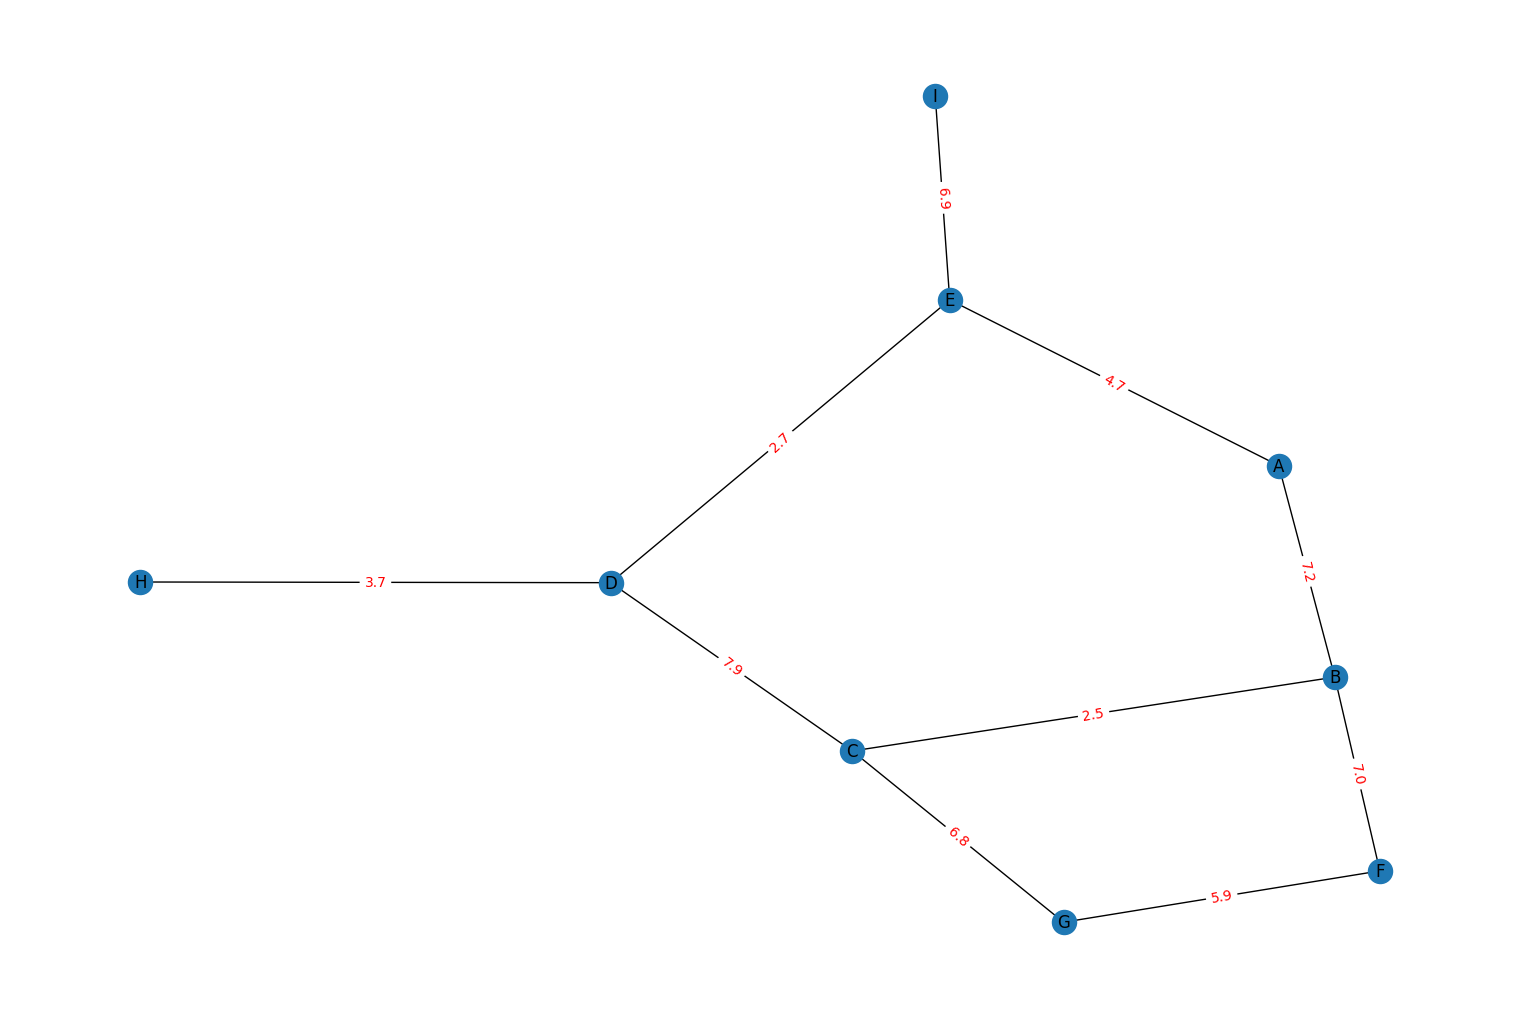

In [19]:
# LoadCSV data into a Pandas
df = pd.read_csv('/content/dataset.csv')

# Creating a dictionary that maps node names to indices in the adjacency matrix
node_dict = {node: i for i, node in enumerate(set(df['src']) | set(df['dst']))}

# Create an empty adjacency matrix for filling it
adj_matrix = np.zeros((len(node_dict), len(node_dict)))

# Fill the adjacency matrix with edge weights it fills
for _, row in df.iterrows():
    src_idx = node_dict[row['src']]
    dst_idx = node_dict[row['dst']]
    adj_matrix[src_idx, dst_idx] = row['weight']

# Create a graph using the adjacency matrix first items
UG = nx.Graph(adj_matrix)

# Set the node labels to be the node names

node_labels = {i: node for node, i in node_dict.items()}
nx.set_node_attributes(UG, node_labels, 'label')

# Draw the graph using NetworkX and Matplotlib
print("The Values are mentioned over here : \n")
pos = nx.spring_layout(UG)
nx.draw(UG, pos, labels=node_labels, with_labels=True)
edge_labels = nx.get_edge_attributes(UG, 'weight')
nx.draw_networkx_edge_labels(UG, pos, edge_labels=edge_labels, font_color='red')
print(adj_matrix)
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.savefig('undirected_graph.png', dpi=100)
plt.show()
print("\n")

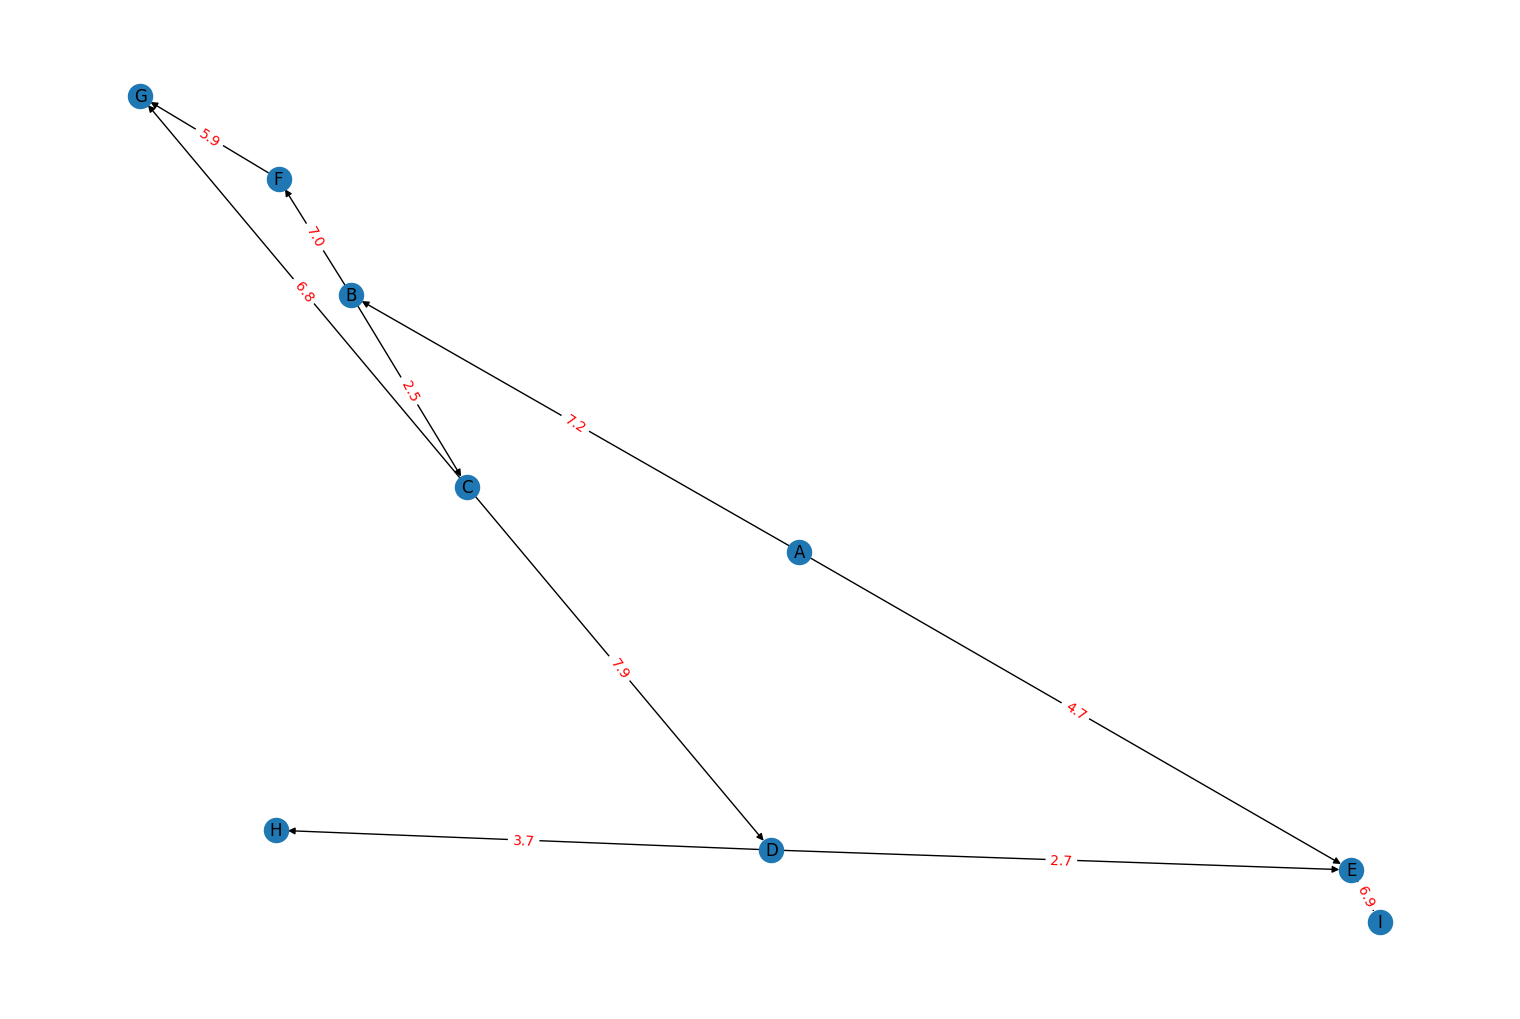

In [4]:
# Create a graph using the adjacency matrix
DG = nx.DiGraph(adj_matrix)

# Set the node labels to be the node names
node_labels = {i: node for node, i in node_dict.items()}
nx.set_node_attributes(DG, node_labels, 'label')

# Draw the graph using NetworkX and Matplotlib
pos = nx.spring_layout(DG)
nx.draw(DG, pos, labels=node_labels, with_labels=True)
edge_labels = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels, font_color='red')
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.savefig('directed_graph.png', dpi=100)
plt.show()

**# Question 2**

## For undirected Graph status

In [20]:
# Number of nodes
print("\nNumber of nodes: " + str(UG.number_of_nodes()))

# Nnumber of edges
print("\nNumber of edges: " + str(UG.number_of_edges()))


Number of nodes: 9

Number of edges: 10


In [21]:
# Node with max degree
max_degree = max(UG.degree(), key=lambda x: x[1])[1] # (index, degree)
print(f"\nNodes with maximum degree of {max_degree} are {[UG.nodes[idx]['label'] for idx, deg in UG.degree() if deg == max_degree]}")

# Node with min degree
min_degree = min(UG.degree(), key=lambda x: x[1])[1]
print(f"\nNodes with minimum degree of {min_degree} are {[UG.nodes[idx]['label'] for idx, deg in UG.degree() if deg == min_degree]}")


Nodes with maximum degree of 3 are ['B', 'D', 'C', 'E']

Nodes with minimum degree of 1 are ['H', 'I']


## For directed GRAPHS

In [22]:
# Number of nodes
print("Number of nodes: " + str(DG.number_of_nodes()))

# Nnumber of edges
print("Number of edges: " + str(DG.number_of_edges()))

Number of nodes: 9
Number of edges: 10


In [8]:
in_degrees = DG.in_degree()
out_degrees = DG.out_degree()

# Node with the maximum in-degree
max_indegree = max(in_degrees, key=lambda x: x[1])[1] # (index, degree)
print(f"Nodes with maximum in-degree of {max_indegree} are {[DG.nodes[idx]['label'] for idx, deg in in_degrees if deg == max_indegree]}")

# Node with the minimum in-degree
min_indegree = min(in_degrees, key=lambda x: x[1])[1] # (index, degree)
print(f"Nodes with minimum in-degree of {min_indegree} are {[DG.nodes[idx]['label'] for idx, deg in in_degrees if deg == min_indegree]}")

# Node with the maximum out-degree
max_outdegree = max(out_degrees, key=lambda x: x[1])[1] # (index, degree)
print(f"Nodes with maximum out-degree of {max_outdegree} are {[DG.nodes[idx]['label'] for idx, deg in out_degrees if deg == max_outdegree]}")

# Print the node with the minimum out-degree
min_outdegree = min(in_degrees, key=lambda x: x[1])[1] # (index, degree)
print(f"Nodes with minimum out-degree of {min_outdegree} are {[DG.nodes[idx]['label'] for idx, deg in out_degrees if deg == min_outdegree]}")

Nodes with maximum in-degree of 2 are ['E', 'G']
Nodes with minimum in-degree of 0 are ['A']
Nodes with maximum out-degree of 2 are ['B', 'D', 'C', 'A']
Nodes with minimum out-degree of 0 are ['H', 'G', 'I']


# Question 3

In [9]:
print(UG.edges(2, data=True))

[(2, 0, {'weight': 3.7}), (2, 5, {'weight': 2.7}), (2, 3, {'weight': 7.9})]


In [24]:
# Get the sum of weights of all outgoing edges for each vertex
outgoing_weights = {}
for node in UG.nodes():
    outgoing_weights[node] = sum([edge[2]['weight'] for edge in UG.edges(node, data=True)])

# Print the sum of weights of outgoing edges for each vertex
for node, weight in outgoing_weights.items():
    print(f"Node {UG.nodes[node]['label']}: Sum of weights edges = {round(weight, 2)}")

Node H: Sum of weights edges = 3.7
Node B: Sum of weights edges = 16.7
Node D: Sum of weights edges = 14.3
Node C: Sum of weights edges = 17.2
Node F: Sum of weights edges = 12.9
Node E: Sum of weights edges = 14.3
Node A: Sum of weights edges = 11.9
Node G: Sum of weights edges = 12.7
Node I: Sum of weights edges = 6.9


In [25]:
# Get the sum of weights of all outgoing edges for each vertex
outgoing_weights = {}
for node in DG.nodes():
    outgoing_weights[node] = sum([edge[2]['weight'] for edge in DG.out_edges(node, data=True)])

# Get the sum of weights of all incoming edges for each vertex
incoming_weights = {}
for node in DG.nodes():
    incoming_weights[node] = sum([edge[2]['weight'] for edge in DG.in_edges(node, data=True)])

# Print the sum of weights of incoming and outgoing edges for each vertex
for node, outgoing_weight in outgoing_weights.items():
    incoming_weight = incoming_weights[node]
    print(f"Node {DG.nodes[node]['label']}: Sum of weights of outgoing edges = {round(outgoing_weight, 2)}, Sum of weights of incoming edges = {round(incoming_weight, 2)}")

Node H: Sum of weights of outgoing edges = 0, Sum of weights of incoming edges = 3.7
Node B: Sum of weights of outgoing edges = 9.5, Sum of weights of incoming edges = 7.2
Node D: Sum of weights of outgoing edges = 6.4, Sum of weights of incoming edges = 7.9
Node C: Sum of weights of outgoing edges = 14.7, Sum of weights of incoming edges = 2.5
Node F: Sum of weights of outgoing edges = 5.9, Sum of weights of incoming edges = 7.0
Node E: Sum of weights of outgoing edges = 6.9, Sum of weights of incoming edges = 7.4
Node A: Sum of weights of outgoing edges = 11.9, Sum of weights of incoming edges = 0
Node G: Sum of weights of outgoing edges = 0, Sum of weights of incoming edges = 12.7
Node I: Sum of weights of outgoing edges = 0, Sum of weights of incoming edges = 6.9


# Question 4

## Undirected graPH

In [13]:
# Degree Centrality
degree_centrality = nx.degree_centrality(UG)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(UG)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(UG)

# PageRank
page_rank = nx.pagerank(UG)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(UG)

# Create a dictionary to hold the centrality measures for each node
centrality = {'Node': [], 'Degree Centrality': [], 'Betweenness Centrality': [], 'Closeness Centrality': [], 'PageRank': [], 'Eigenvector Centrality': []}

# Populate the dictionary with the centrality measures for each node
for node in UG.nodes():
    centrality['Node'].append(UG.nodes[node]['label'])
    centrality['Degree Centrality'].append(round(degree_centrality[node], 2))
    centrality['Betweenness Centrality'].append(round(betweenness_centrality[node], 2))
    centrality['Closeness Centrality'].append(round(closeness_centrality[node], 2))
    centrality['PageRank'].append(round(page_rank[node], 2))
    centrality['Eigenvector Centrality'].append(round(eigenvector_centrality[node], 2))

# Create a Pandas dataframe from the centrality dictionary
df2 = pd.DataFrame(centrality)
df2 = df2.sort_values(by=['Node'])

# Print the dataframe
print(df2.to_string(index=False))

Node  Degree Centrality  Betweenness Centrality  Closeness Centrality  PageRank  Eigenvector Centrality
   A               0.25                    0.14                  0.50      0.11                    0.32
   B               0.38                    0.23                  0.53      0.14                    0.44
   C               0.38                    0.32                  0.57      0.15                    0.46
   D               0.38                    0.39                  0.57      0.14                    0.39
   E               0.38                    0.32                  0.53      0.14                    0.34
   F               0.25                    0.04                  0.40      0.11                    0.30
   G               0.25                    0.05                  0.42      0.11                    0.31
   H               0.12                    0.00                  0.38      0.05                    0.16
   I               0.12                    0.00                 

In [14]:
# Create a list of dictionaries containing centrality measures and corresponding nodes
centrality_list = [
    {
        'centrality': 'degree centrality',
        'min node': df2['Node'].iloc[df2['Degree Centrality'].idxmin()],
        'min score': df2['Degree Centrality'].min(),
        'max node': df2['Node'].iloc[df2['Degree Centrality'].idxmax()],
        'max score': df2['Degree Centrality'].max()        
    },
    {
        'centrality': 'betweenness centrality',
        'min node': df2['Node'].iloc[df2['Betweenness Centrality'].idxmin()],
        'min score': df2['Betweenness Centrality'].min(),
        'max node': df2['Node'].iloc[df2['Betweenness Centrality'].idxmax()],
        'max score': df2['Betweenness Centrality'].max()        
    },
    {
        'centrality': 'closeness centrality',
        'min node': df2['Node'].iloc[df2['Closeness Centrality'].idxmin()],
        'min score': df2['Closeness Centrality'].min(),
        'max node': df2['Node'].iloc[df2['Closeness Centrality'].idxmax()],
        'max score': df2['Closeness Centrality'].max()                
    },
    {
        'centrality': 'page rank',
        'min node': df2['Node'].iloc[df2['PageRank'].idxmin()],
        'min score': df2['PageRank'].min(),
        'max node': df2['Node'].iloc[df2['PageRank'].idxmax()],
        'max score': df2['PageRank'].max()        
    },
    {
        'centrality': 'eigenvector centrality',
        'min node': df2['Node'].iloc[df2['Eigenvector Centrality'].idxmin()],
        'min score': df2['Eigenvector Centrality'].min(),
        'max node': df2['Node'].iloc[df2['Eigenvector Centrality'].idxmax()],
        'max score': df2['Eigenvector Centrality'].max()        
    },
]

# Create a new dataframe with the list of dictionaries
df3 = pd.DataFrame(centrality_list)

# Set the index to be the centrality measure
df3 = df3.set_index('centrality')

# Display the dataframe with formatted values
print("Centrality Measures and Corresponding Nodes:\n")
print(df3.to_string(formatters={
    'min score': '{:.2f}'.format,
    'max score': '{:.2f}'.format
}))

Centrality Measures and Corresponding Nodes:

                       min node min score max node max score
centrality                                                  
degree centrality             A      0.12        B      0.38
betweenness centrality        A      0.00        C      0.39
closeness centrality          I      0.36        D      0.57
page rank                     A      0.05        D      0.15
eigenvector centrality        I      0.14        D      0.46


## Directed

In [16]:
# Degree Centrality 
in_degree_centrality = nx.in_degree_centrality(DG)
out_degree_centrality = nx.out_degree_centrality(DG)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(DG)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(DG)

# PageRank
page_rank = nx.pagerank(DG)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(DG)

# Create a dictionary to hold the centrality measures for each node
centrality = {'Node': [], 'In-Degree Centrality': [], 'Out-Degree Centrality': [], 'Betweenness Centrality': [], 'Closeness Centrality': [], 'PageRank': [], 'Eigenvector Centrality': []}

# Populate the dictionary with the centrality measures for each node
for node in DG.nodes():
    centrality['Node'].append(DG.nodes[node]['label'])
    centrality['In-Degree Centrality'].append(round(in_degree_centrality[node], 2))
    centrality['Out-Degree Centrality'].append(round(out_degree_centrality[node], 2))
    centrality['Betweenness Centrality'].append(round(betweenness_centrality[node], 2))
    centrality['Closeness Centrality'].append(round(closeness_centrality[node], 2))
    centrality['PageRank'].append(round(page_rank[node], 2))
    centrality['Eigenvector Centrality'].append(round(eigenvector_centrality[node], 2))

# Create a Pandas dataframe from the centrality dictionary
df4 = pd.DataFrame(centrality)
df4 = df4.sort_values(by=['Node'])

# Print the dataframe
print(df4.to_string(index=False))

Node  In-Degree Centrality  Out-Degree Centrality  Betweenness Centrality  Closeness Centrality  PageRank  Eigenvector Centrality
   A                  0.00                   0.25                    0.00                  0.00      0.06                     0.0
   B                  0.12                   0.25                    0.09                  0.12      0.09                     0.0
   C                  0.12                   0.25                    0.12                  0.17      0.08                     0.0
   D                  0.12                   0.25                    0.12                  0.19      0.10                     0.0
   E                  0.25                   0.12                    0.07                  0.29      0.11                     0.0
   F                  0.12                   0.12                    0.02                  0.17      0.12                     0.0
   G                  0.25                   0.00                    0.00                 

In [17]:
centrality_list = [
  {
    'centrality': 'in-degree centrality',
    'min node': df4['Node'].iloc[df4['In-Degree Centrality'].idxmin()],
    'min score': df4['In-Degree Centrality'].min(),
    'max node': df4['Node'].iloc[df4['In-Degree Centrality'].idxmax()],
    'max score': df4['In-Degree Centrality'].max()
  },
  {
    'centrality': 'out-degree centrality',
    'min node': df4['Node'].iloc[df4['Out-Degree Centrality'].idxmin()],
    'min score': df4['Out-Degree Centrality'].min(),
    'max node': df4['Node'].iloc[df4['Out-Degree Centrality'].idxmax()],
    'max score': df4['Out-Degree Centrality'].max()
  },
  {
    'centrality': 'betweenness centrality',
    'min node': df4['Node'].iloc[df4['Betweenness Centrality'].idxmin()],
    'min score': df4['Betweenness Centrality'].min(),
    'max node': df4['Node'].iloc[df4['Betweenness Centrality'].idxmax()],
    'max score': df4['Betweenness Centrality'].max()
  },
  {
    'centrality': 'closeness centrality',
    'min node': df4['Node'].iloc[df4['Closeness Centrality'].idxmin()],
    'min score': df4['Closeness Centrality'].min(),
    'max node': df4['Node'].iloc[df4['Closeness Centrality'].idxmax()],
    'max score': df4['Closeness Centrality'].max()
  },
  {
    'centrality': 'page rank',
    'min node': df4['Node'].iloc[df4['PageRank'].idxmin()],
    'min score': df4['PageRank'].min(),
    'max node': df4['Node'].iloc[df4['PageRank'].idxmax()],
    'max score': df4['PageRank'].max()
  },
  {
    'centrality': 'eigenvector centrality',
    'min node': df4['Node'].iloc[df4['Eigenvector Centrality'].idxmin()],
    'min score': df4['Eigenvector Centrality'].min(),
    'max node': df4['Node'].iloc[df4['Eigenvector Centrality'].idxmax()],
    'max score': df4['Eigenvector Centrality'].max()
  },
]

# Create a new dataframe with the list of dictionaries
df5 = pd.DataFrame(centrality_list)

# Set the index to be the centrality measure
df5 = df5.set_index('centrality')

# Display the dataframe with formatted values
print("Centrality Measures and Corresponding Nodes:\n")
print(df5.to_string(formatters={
  'min score': '{:.2f}'.format,
  'max score': '{:.2f}'.format
}))

Centrality Measures and Corresponding Nodes:

                       min node min score max node max score
centrality                                                  
in-degree centrality          G      0.00        F      0.25
out-degree centrality         H      0.00        G      0.25
betweenness centrality        G      0.00        D      0.12
closeness centrality          G      0.00        F      0.29
page rank                     G      0.06        H      0.19
eigenvector centrality        G      0.00        I      1.00
